#생육 데이터를 전처리하고 분석하는 코드

원본 데이터:
   Dry_Bulb_Temperature  Wet_Bulb_Temperature  Relative_Humidity  \
0                  25.0                  20.0               60.0   
1                  26.0                  21.0               65.0   
2                  27.0                  22.0                NaN   
3                   NaN                  23.0               75.0   
4                  29.0                   NaN               80.0   

   CO2_Concentration  Growth_Index  
0                400          50.0  
1                420          52.0  
2                390          48.0  
3                430          53.0  
4                410           NaN  

전처리된 데이터 (정규화):
   Dry_Bulb_Temperature  Wet_Bulb_Temperature  Relative_Humidity  \
0                 0.000              0.000000           0.000000   
1                 0.500              0.333333           0.333333   
2                 1.000              0.666667           0.666667   
3                 0.875              1.000000           1.000000   

   

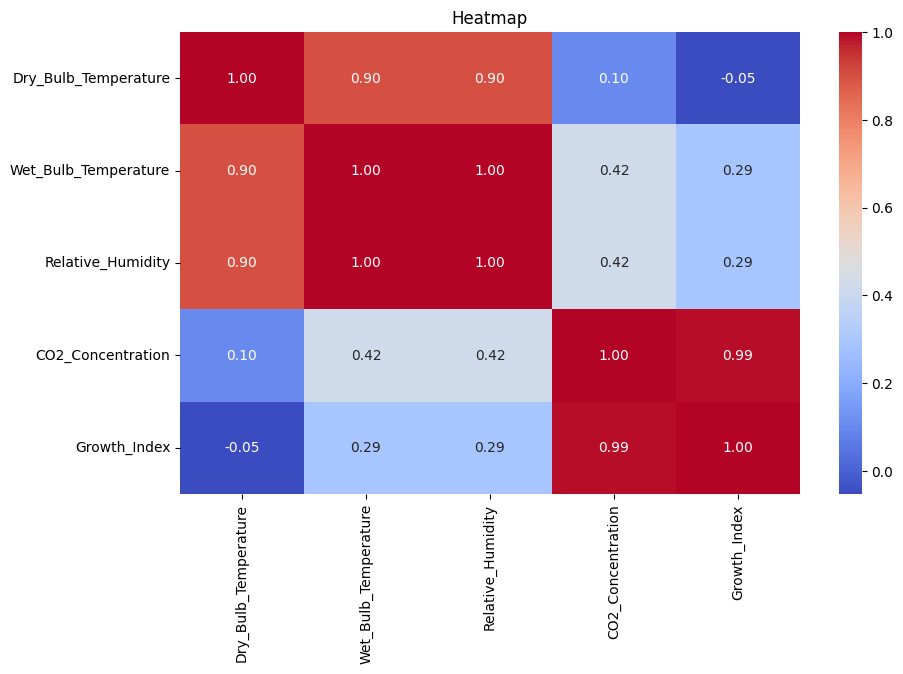

/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE

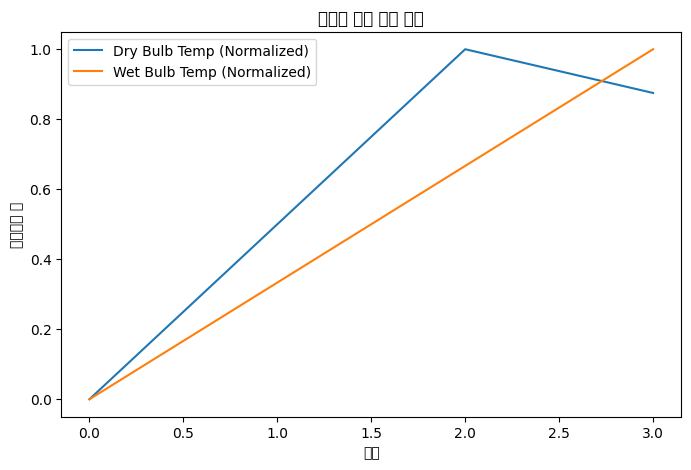

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 예제 데이터 로드 (CSV 파일에서 데이터 읽기)
data = pd.read_csv("tomato.csv")  
data = pd.DataFrame({
    "Dry_Bulb_Temperature": [25, 26, 27, np.nan, 29],
    "Wet_Bulb_Temperature": [20, 21, 22, 23, np.nan],
    "Relative_Humidity": [60, 65, np.nan, 75, 80],
    "CO2_Concentration": [400, 420, 390, 430, 410],
    "Growth_Index": [50, 52, 48, 53, np.nan]
})

print("원본 데이터:")
print(data)

# 1. 결측값 처리
# 평균값으로 대체 (필요에 따라 다른 방식 선택 가능)
data.fillna(data.mean(), inplace=True)

# 2. 이상치 제거
# 이상치 탐지 및 제거 (IQR 방법 사용)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# 3. 변수 정규화 (Min-Max Scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(scaled_data, columns=data.columns)

print("\n전처리된 데이터 (정규화):")
print(normalized_data)

# 4. 데이터 시각화
# 변수 간 상관관계 시각화 (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

# 시간에 따른 변화 시각화 (예: 건구 온도)
plt.figure(figsize=(8, 5))
plt.plot(normalized_data["Dry_Bulb_Temperature"], label="Dry Bulb Temp (Normalized)")
plt.plot(normalized_data["Wet_Bulb_Temperature"], label="Wet Bulb Temp (Normalized)")
plt.legend()
plt.title("시간에 따른 온도 변화")
plt.xlabel("시간")
plt.ylabel("정규화된 값")
plt.show()


원본 데이터:
   Dry_Bulb_Temperature  Wet_Bulb_Temperature  Relative_Humidity  \
0                    25                    20                 60   
1                    26                    21                 65   
2                    27                    22                 70   
3                    28                    23                 75   
4                    29                    24                 80   
5                    30                    25                 85   
6                    31                    26                 90   
7                    24                    19                 55   
8                    23                    18                 50   
9                    22                    17                 45   

   CO2_Concentration  Growth_Index Quality  
0                400            50      우수  
1                420            52      우수  
2                390            55      양호  
3                430            53      우수  
4                4

/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwang/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SE

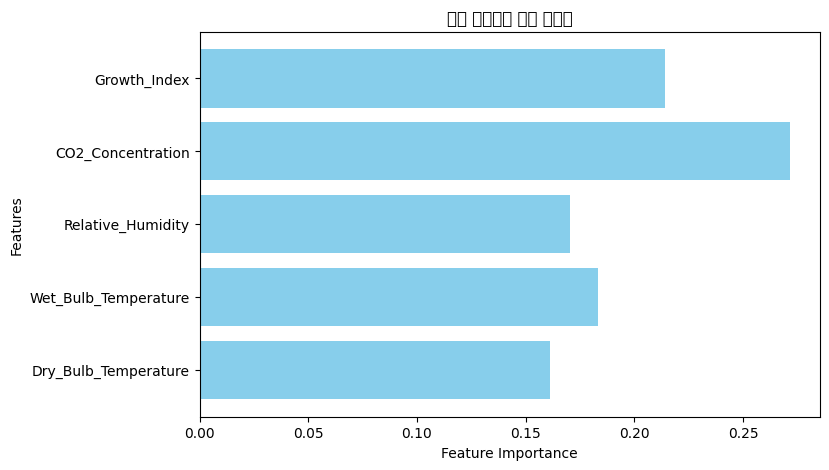


새로운 데이터 품질 예측:
예측 품질: 우수


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 생성 (실제 데이터 대신 예제 데이터 사용)
data = pd.DataFrame({
    "Dry_Bulb_Temperature": [25, 26, 27, 28, 29, 30, 31, 24, 23, 22],
    "Wet_Bulb_Temperature": [20, 21, 22, 23, 24, 25, 26, 19, 18, 17],
    "Relative_Humidity": [60, 65, 70, 75, 80, 85, 90, 55, 50, 45],
    "CO2_Concentration": [400, 420, 390, 430, 410, 440, 450, 380, 370, 360],
    "Growth_Index": [50, 52, 55, 53, 57, 60, 63, 48, 45, 42],  # 생육 지수
    "Quality": ["우수", "우수", "양호", "우수", "양호", "우수", "우수", "불량", "불량", "불량"]  # 품질 레이블
})

print("원본 데이터:")
print(data)

# 2. 데이터 전처리
# (a) 독립 변수(X)와 종속 변수(y) 분리
X = data.drop(columns=["Quality"])
y = data["Quality"]

# (b) 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# (c) 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = model.predict(X_test)

print("\n혼동 행렬(Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))

print("\n분류 보고서(Classification Report):")
print(classification_report(y_test, y_pred))

# 5. 변수 중요도 시각화
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = data.columns[:-1]  # Quality 제외

plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("랜덤 포레스트 변수 중요도")
plt.show()

# 6. 새로운 데이터 예측
new_data = pd.DataFrame({
    "Dry_Bulb_Temperature": [26],
    "Wet_Bulb_Temperature": [21],
    "Relative_Humidity": [68],
    "CO2_Concentration": [410],
    "Growth_Index": [54]
})

new_data_scaled = scaler.transform(new_data)
predicted_quality = model.predict(new_data_scaled)

print("\n새로운 데이터 품질 예측:")
print(f"예측 품질: {predicted_quality[0]}")


In [8]:
pip install 'qrcode[pil]'


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 45 kB 3.4 MB/s eta 0:00:011
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import qrcode
import pandas as pd
import os

# 1. 예제 데이터 준비
data = pd.DataFrame({
    "Product_ID": ["001", "002", "003"],
    "Production_Date": ["2024-11-01", "2024-11-02", "2024-11-03"],
    "Dry_Bulb_Temperature": [25, 26, 27],
    "Relative_Humidity": [60, 65, 70],
    "CO2_Concentration": [400, 420, 390],
    "Quality": ["우수", "양호", "우수"]
})

print("생육 데이터:")
print(data)

# 2. QR 코드 저장 디렉토리 설정
output_dir = "qr_codes"
os.makedirs(output_dir, exist_ok=True)

# 3. QR 코드 생성
for _, row in data.iterrows():
    # 데이터 구성
    qr_data = {
        "Product_ID": row["Product_ID"],
        "Production_Date": row["Production_Date"],
        "Dry_Bulb_Temperature": row["Dry_Bulb_Temperature"],
        "Relative_Humidity": row["Relative_Humidity"],
        "CO2_Concentration": row["CO2_Concentration"],
        "Quality": row["Quality"]
    }
    
    # 텍스트 형식으로 QR 코드에 포함
    qr_text = "\n".join([f"{key}: {value}" for key, value in qr_data.items()])
    
    # QR 코드 생성
    qr = qrcode.QRCode(
        version=1,  # QR 코드 크기 (1 ~ 40)
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,  # 박스 크기
        border=4  # 여백 크기
    )
    qr.add_data(qr_text)
    qr.make(fit=True)
    
    # QR 코드 이미지를 저장
    qr_img = qr.make_image(fill_color="black", back_color="white")
    qr_file_path = os.path.join(output_dir, f"{row['Product_ID']}_qr.png")
    qr_img.save(qr_file_path)

    print(f"QR 코드 생성 완료: {qr_file_path}")

# 4. 완료 메시지
print(f"\nQR 코드가 {output_dir} 폴더에 저장되었습니다.")


생육 데이터:
  Product_ID Production_Date  Dry_Bulb_Temperature  Relative_Humidity  \
0        001      2024-11-01                    25                 60   
1        002      2024-11-02                    26                 65   
2        003      2024-11-03                    27                 70   

   CO2_Concentration Quality  
0                400      우수  
1                420      양호  
2                390      우수  
QR 코드 생성 완료: qr_codes/001_qr.png
QR 코드 생성 완료: qr_codes/002_qr.png
QR 코드 생성 완료: qr_codes/003_qr.png

QR 코드가 qr_codes 폴더에 저장되었습니다.


In [10]:
import qrcode

# QR 코드 데이터 (예: 인증 정보)
qr_data = {
    "Product_ID": "ABC12345",
    "Product_Name": "토마토",
    "Quality_Grade": "우수 품질",
    "Expiration_Date": "2025-11-20"
}

# 데이터 포맷을 텍스트로 변환
qr_text = "\n".join([f"{key}: {value}" for key, value in qr_data.items()])

# QR 코드 생성
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_text)
qr.make(fit=True)

# QR 코드 이미지 파일 저장
qr_image_path = "static/qr-code.png"  # HTML에서 접근할 수 있는 경로
qr_img = qr.make_image(fill_color="black", back_color="white")
qr_img.save(qr_image_path)

print(f"QR 코드가 '{qr_image_path}'에 저장되었습니다.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hwang/Desktop/Growth-Data-Analysis/static/qr-code.png'